<a href="https://colab.research.google.com/github/janithabimasha/content/blob/main/CarPricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
car_data = "/content/drive/MyDrive/DDM/CarPrice.csv"
df = pd.read_csv(car_data)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(205, 26)

In [ ]:
df=df.drop(columns='CarName')

In [ ]:
df.shape

(205, 25)

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          1
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               1
dtype: int64

In [ ]:
df[df['doornumber'].isnull()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
11,12,0,gas,std,NaN,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925.0


In [ ]:
df.at[11,'doornumber'] = 'four'
df.loc[[11]]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
11,12,0,gas,std,four,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925.0


In [ ]:
df[df['price'].isnull()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
124,125,3,gas,turbo,two,hatchback,rwd,front,95.9,173.2,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,NaN


In [ ]:
df['price'].fillna(df['price'].mean(), inplace = True)
df.loc[120:125]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
120,121,1,gas,std,four,hatchback,fwd,front,93.7,157.3,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.000000
121,122,1,gas,std,four,sedan,fwd,front,93.7,167.3,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.000000
122,123,1,gas,std,four,sedan,fwd,front,93.7,167.3,...,98,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.000000
123,124,-1,gas,std,four,wagon,fwd,front,103.3,174.6,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921.000000
124,125,3,gas,turbo,two,hatchback,rwd,front,95.9,173.2,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,13279.223858
125,126,3,gas,std,two,hatchback,rwd,front,94.5,168.9,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018.000000


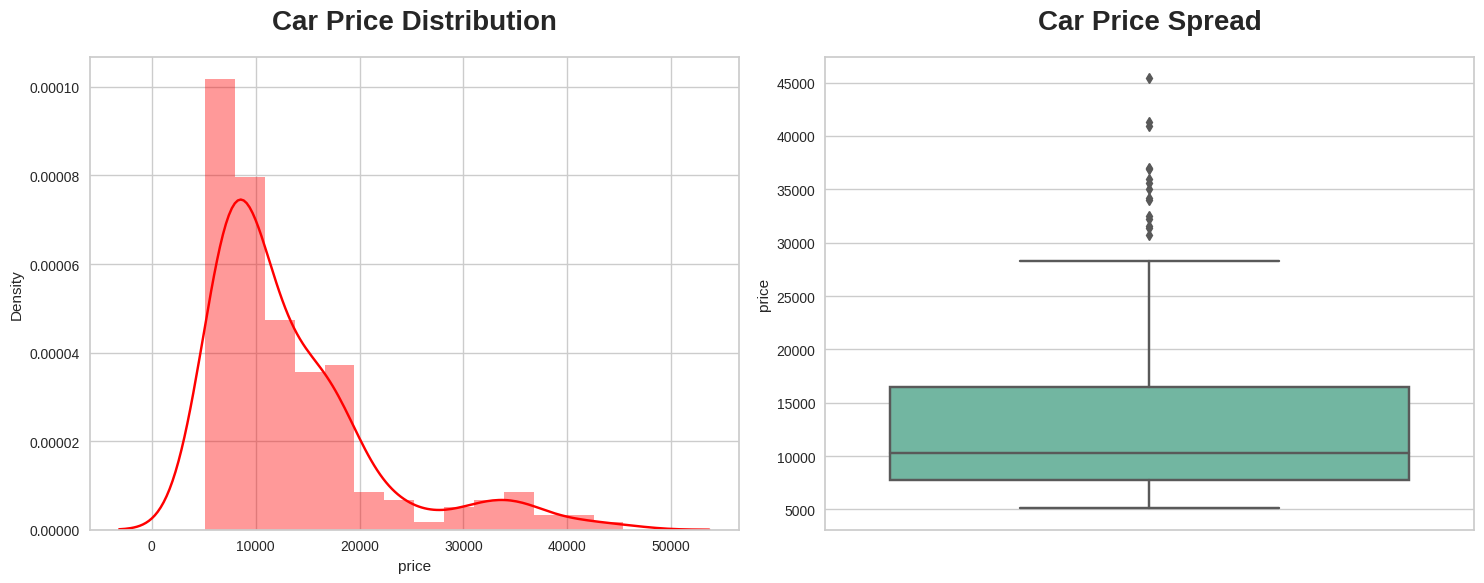

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
print(np.where(df['price']>27000))

(array([ 15,  16,  17,  47,  48,  49,  68,  69,  70,  71,  72,  73,  74,
       126, 127, 128, 129]),)


In [ ]:
df.drop(index=[ 15,  16,  17,  47,  48,  49,  68,  69,  70,  71,  72,  73,  74,
       126, 127, 128, 129], inplace=True)

In [ ]:
df.shape

(188, 25)

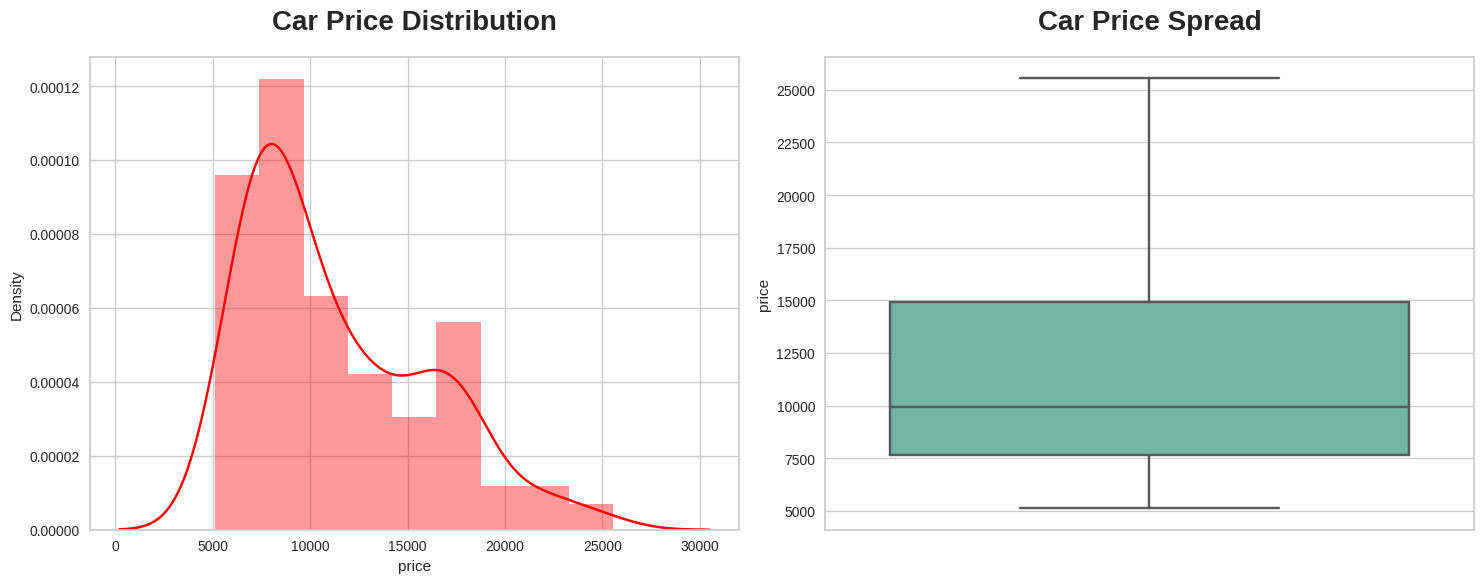

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            188 non-null    int64  
 1   symboling         188 non-null    int64  
 2   fueltype          188 non-null    object 
 3   aspiration        188 non-null    object 
 4   doornumber        188 non-null    object 
 5   carbody           188 non-null    object 
 6   drivewheel        188 non-null    object 
 7   enginelocation    188 non-null    object 
 8   wheelbase         188 non-null    float64
 9   carlength         188 non-null    float64
 10  carwidth          188 non-null    float64
 11  carheight         188 non-null    float64
 12  curbweight        188 non-null    int64  
 13  enginetype        188 non-null    object 
 14  cylindernumber    188 non-null    object 
 15  enginesize        188 non-null    int64  
 16  fuelsystem        188 non-null    object 
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,105.845745,0.851064,98.169149,172.637234,65.585638,53.722872,2467.877660,117.728723,3.300638,3.247128,10.063404,96.957447,5132.712766,25.989362,31.590426,11331.713654
std,60.128496,1.227645,5.202006,11.307477,1.790276,2.409952,432.044822,26.149219,0.261492,0.302983,3.862052,30.268819,467.221372,6.232560,6.475566,4683.373818
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,53.750000,0.000000,94.500000,166.300000,64.000000,52.000000,2126.500000,97.000000,3.117500,3.117500,8.675000,70.000000,4800.000000,21.000000,26.750000,7669.000000
50%,107.500000,1.000000,96.500000,172.400000,65.400000,54.100000,2390.000000,110.000000,3.270000,3.280000,9.000000,92.000000,5200.000000,25.000000,31.000000,9927.000000
75%,158.250000,2.000000,100.400000,177.900000,66.500000,55.500000,2819.250000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14911.750000
max,205.000000,3.000000,114.200000,198.900000,71.400000,59.800000,3515.000000,183.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,25552.000000


In [ ]:
df.nunique()

car_ID              188
symboling             6
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        1
wheelbase            45
carlength            65
carwidth             36
carheight            46
curbweight          157
enginetype            6
cylindernumber        5
enginesize           36
fuelsystem            8
boreratio            35
stroke               33
compressionratio     30
horsepower           52
peakrpm              20
citympg              26
highwaympg           26
price               172
dtype: int64

In [ ]:
df.groupby('fueltype').size()

fueltype
diesel     17
gas       171
dtype: int64

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'boreratio'}>],
       [<Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peakrpm'}>],
       [<Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

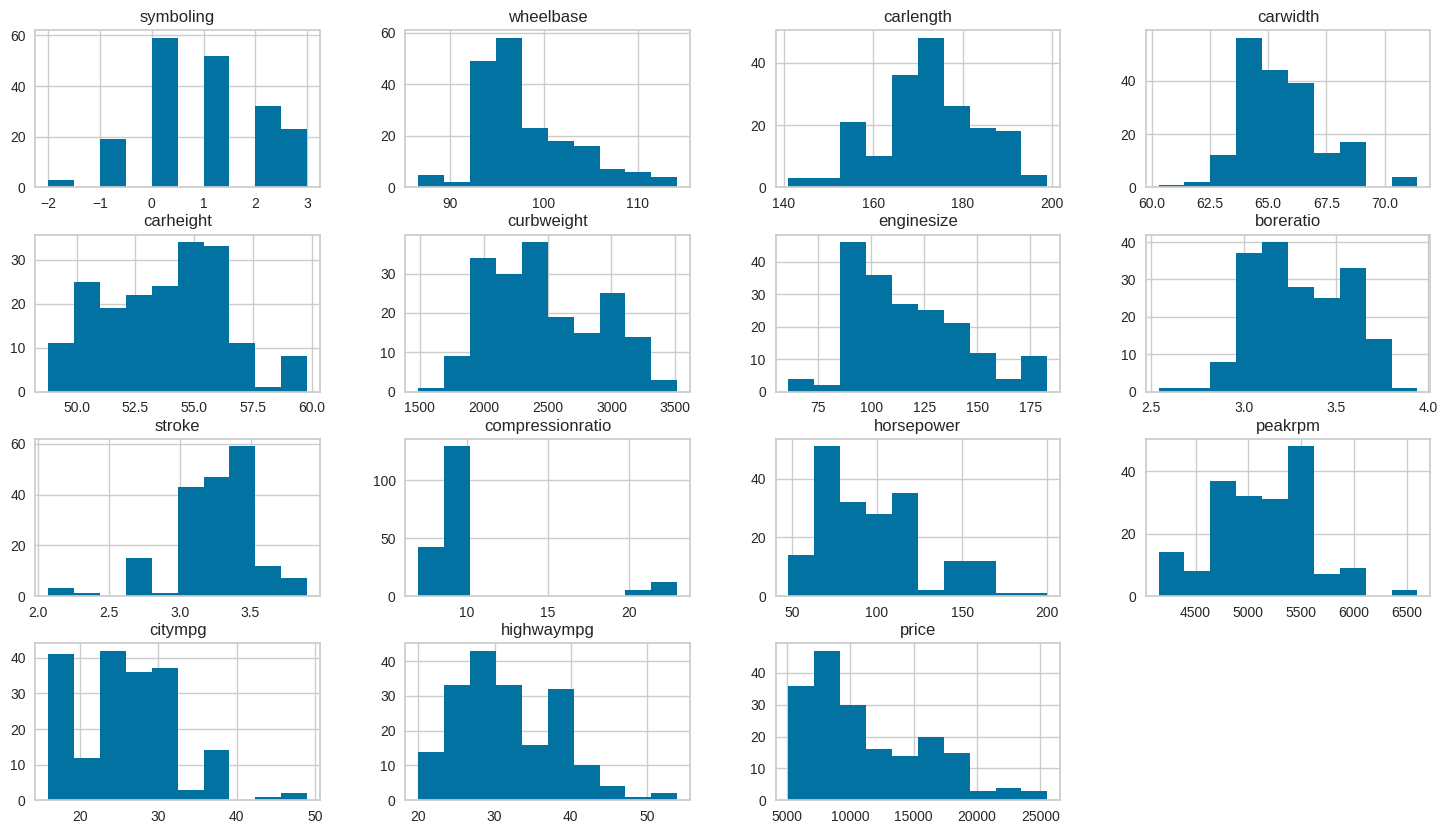

In [ ]:
df.hist(['symboling','wheelbase','carlength', 'carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'], figsize=(18,10))

In [ ]:
def PlotBarCharts(inpData, colsToPlot):

  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns
  %matplotlib inline

  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


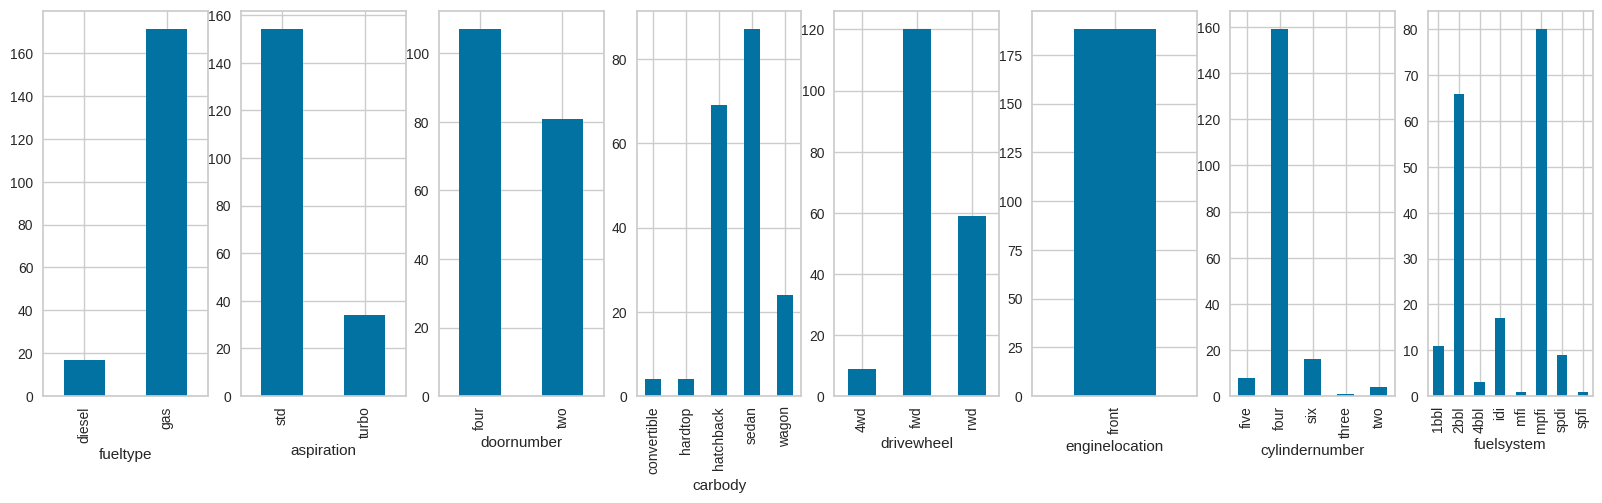

In [ ]:
PlotBarCharts(inpData=df, colsToPlot=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','fuelsystem'])

In [ ]:
ContinuousCols=['price','symboling','wheelbase','carlength', 'carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

CorrelationData=df[ContinuousCols].corr()
CorrelationData

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,1.000000,-0.096508,0.652122,0.731277,0.774570,0.225958,0.843003,0.730507,0.494913,0.035950,0.093315,0.746000,-0.083492,-0.691979,-0.696985
symboling,-0.096508,1.000000,-0.500714,-0.315949,-0.188573,-0.534584,-0.199512,-0.101547,-0.146960,0.071304,-0.150015,0.086894,0.225303,-0.054024,0.006412
wheelbase,0.652122,-0.500714,1.000000,0.856133,0.785391,0.625567,0.770561,0.549187,0.503936,0.030578,0.261929,0.369008,-0.280935,-0.452782,-0.503388
carlength,0.731277,-0.315949,0.856133,1.000000,0.831563,0.525505,0.871013,0.678219,0.593409,0.040910,0.156672,0.559713,-0.233480,-0.644130,-0.659148
carwidth,0.774570,-0.188573,0.785391,0.831563,1.000000,0.323661,0.826910,0.677174,0.521113,0.137502,0.165562,0.603288,-0.150634,-0.611503,-0.629875
carheight,0.225958,-0.534584,0.625567,0.525505,0.323661,1.000000,0.369104,0.153191,0.202006,-0.124903,0.251174,-0.052138,-0.295835,-0.073112,-0.121763
curbweight,0.843003,-0.199512,0.770561,0.871013,0.826910,0.369104,1.000000,0.826954,0.624291,0.092591,0.141683,0.740524,-0.230668,-0.734855,-0.764275
enginesize,0.730507,-0.101547,0.549187,0.678219,0.677174,0.153191,0.826954,1.000000,0.573581,0.249625,0.054275,0.762257,-0.302684,-0.614226,-0.622042
boreratio,0.494913,-0.146960,0.503936,0.593409,0.521113,0.202006,0.624291,0.573581,1.000000,-0.093642,-0.008682,0.492303,-0.294722,-0.523512,-0.537948
stroke,0.035950,0.071304,0.030578,0.040910,0.137502,-0.124903,0.092591,0.249625,-0.093642,1.000000,0.175789,0.130759,0.009979,-0.019627,-0.001720


In [ ]:
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

price         1.000000
wheelbase     0.652122
carlength     0.731277
carwidth      0.774570
curbweight    0.843003
enginesize    0.730507
horsepower    0.746000
citympg      -0.691979
highwaympg   -0.696985
Name: price, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['fueltype'] = enc.fit_transform(df['fueltype'])
df['aspiration'] = enc.fit_transform(df['aspiration'])
df['doornumber']=enc.fit_transform(df['doornumber'])
df['carbody']=enc.fit_transform(df['carbody'])
df['drivewheel']=enc.fit_transform(df['drivewheel'])
df['enginelocation']=enc.fit_transform(df['enginelocation'])
df['cylindernumber']=enc.fit_transform(df['cylindernumber'])
df['fuelsystem']=enc.fit_transform(df['fuelsystem'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            188 non-null    int64  
 1   symboling         188 non-null    int64  
 2   fueltype          188 non-null    int64  
 3   aspiration        188 non-null    int64  
 4   doornumber        188 non-null    int64  
 5   carbody           188 non-null    int64  
 6   drivewheel        188 non-null    int64  
 7   enginelocation    188 non-null    int64  
 8   wheelbase         188 non-null    float64
 9   carlength         188 non-null    float64
 10  carwidth          188 non-null    float64
 11  carheight         188 non-null    float64
 12  curbweight        188 non-null    int64  
 13  enginetype        188 non-null    object 
 14  cylindernumber    188 non-null    int64  
 15  enginesize        188 non-null    int64  
 16  fuelsystem        188 non-null    int64  
 1

In [ ]:
df.head(20)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,1,0,1,3,1,0,99.8,177.3,...,136,5,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,1,0,0,3,1,0,105.8,192.7,...,136,5,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,1,0,0,4,1,0,105.8,192.7,...,136,5,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,1,1,0,3,1,0,105.8,192.7,...,131,5,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,1,1,1,2,0,0,99.5,178.2,...,131,5,3.13,3.40,7.00,160,5500,16,22,17859.167


In [ ]:
import scipy.stats as stats
from scipy.stats import f_oneway

CategoryGroupLists=df.groupby('fueltype')['price'].apply(list)
AnovaResults=f_oneway(*CategoryGroupLists)
print('P-Value for Fuel Type anova is: ', AnovaResults[1])

CategoryGroupLists=df.groupby('aspiration')['price'].apply(list)
AnovaResults=f_oneway(*CategoryGroupLists)
print('P-Value for Aspiration anova is: ', AnovaResults[1])

CategoryGroupLists=df.groupby('doornumber')['price'].apply(list)
AnovaResults=f_oneway(*CategoryGroupLists)
print('P-Value for Door Number anova is: ', AnovaResults[1])

CategoryGroupLists=df.groupby('carbody')['price'].apply(list)
AnovaResults=f_oneway(*CategoryGroupLists)
print('P-Value for Car Body anova is: ', AnovaResults[1])

CategoryGroupLists=df.groupby('drivewheel')['price'].apply(list)
AnovaResults=f_oneway(*CategoryGroupLists)
print('P-Value for Drive Wheel anova is: ', AnovaResults[1])

CategoryGroupLists=df.groupby('cylindernumber')['price'].apply(list)
AnovaResults=f_oneway(*CategoryGroupLists)
print('P-Value for Cylinder Number anova is: ', AnovaResults[1])

CategoryGroupLists=df.groupby('fuelsystem')['price'].apply(list)
AnovaResults=f_oneway(*CategoryGroupLists)
print('P-Value for Fuel System Number anova is: ', AnovaResults[1])

P-Value for Fuel Type anova is:  0.0497059968372638
P-Value for Aspiration anova is:  5.4051288266957334e-08
P-Value for Door Number anova is:  0.027981991478432295
P-Value for Car Body anova is:  0.027827749590119136
P-Value for Drive Wheel anova is:  8.38613719070871e-21
P-Value for Cylinder Number anova is:  2.143120455434319e-15
P-Value for Fuel System Number anova is:  2.5912077478584906e-24


In [ ]:
SelectedColumns= ['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','fueltype','doornumber','carbody']
DataForML=df[SelectedColumns]
DataForML.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,fueltype,doornumber,carbody
0,88.6,168.8,64.1,2548,130,111,21,27,1,1,0
1,88.6,168.8,64.1,2548,130,111,21,27,1,1,0
2,94.5,171.2,65.5,2823,152,154,19,26,1,1,2
3,99.8,176.6,66.2,2337,109,102,24,30,1,0,3
4,99.4,176.6,66.4,2824,136,115,18,22,1,0,3


In [ ]:
DataForML['price']=df['price']
DataForML.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,fueltype,doornumber,carbody,price
0,88.6,168.8,64.1,2548,130,111,21,27,1,1,0,13495.0
1,88.6,168.8,64.1,2548,130,111,21,27,1,1,0,16500.0
2,94.5,171.2,65.5,2823,152,154,19,26,1,1,2,16500.0
3,99.8,176.6,66.2,2337,109,102,24,30,1,0,3,13950.0
4,99.4,176.6,66.4,2824,136,115,18,22,1,0,3,17450.0


In [ ]:
Target='price'
Feature=['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','fueltype','doornumber','carbody']
X=DataForML[Feature].values
y=DataForML[Target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [ ]:
X_train[0:4]

array([[9.370e+01, 1.579e+02, 6.360e+01, 2.120e+03, 1.080e+02, 7.300e+01,
        2.600e+01, 3.100e+01, 1.000e+00, 1.000e+00, 2.000e+00],
       [9.510e+01, 1.624e+02, 6.380e+01, 2.008e+03, 9.700e+01, 6.900e+01,
        3.100e+01, 3.700e+01, 1.000e+00, 1.000e+00, 1.000e+00],
       [9.370e+01, 1.500e+02, 6.400e+01, 1.956e+03, 9.200e+01, 7.600e+01,
        3.000e+01, 3.400e+01, 1.000e+00, 1.000e+00, 2.000e+00],
       [9.650e+01, 1.634e+02, 6.400e+01, 2.010e+03, 9.200e+01, 7.600e+01,
        3.000e+01, 3.400e+01, 1.000e+00, 0.000e+00, 3.000e+00]])

In [ ]:
y_train[0:4]

array([7053., 8249., 7129., 7295.])

In [ ]:
print('Training data of X variable', X_train.shape)
print('Testing data of X variable', X_test.shape)
print('Training data of y variable', y_train.shape)
print('Testing data of y variable', y_test.shape)

Training data of X variable (131, 11)
Testing data of X variable (57, 11)
Training data of y variable (131,)
Testing data of y variable (57,)


In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
DataForML.loc[5]

wheelbase        99.8
carlength       177.3
carwidth         66.3
curbweight     2507.0
enginesize      136.0
horsepower      110.0
citympg          19.0
highwaympg       25.0
fueltype          1.0
doornumber        1.0
carbody           3.0
price         15250.0
Name: 5, dtype: float64

In [ ]:
linear_reg.predict([[99.8,177.3,66.3,2507.0,136.0,110.0,19.0,25.0,1.0,1.0,3.0]])

array([11564.4467384])

In [ ]:
DataForML.loc[10]

wheelbase       101.2
carlength       176.8
carwidth         64.8
curbweight     2395.0
enginesize      108.0
horsepower      101.0
citympg          23.0
highwaympg       29.0
fueltype          1.0
doornumber        1.0
carbody           3.0
price         16430.0
Name: 10, dtype: float64

In [ ]:
linear_reg.predict([[101.2,176.8,64.8,2395.0,108.0,101.0,23.0,29.0,1.0,1.0,3.0]])

array([10581.65608571])

In [ ]:
DataForML.loc[20]

wheelbase       94.5
carlength      158.8
carwidth        63.6
curbweight    1909.0
enginesize      90.0
horsepower      70.0
citympg         38.0
highwaympg      43.0
fueltype         1.0
doornumber       0.0
carbody          3.0
price         6575.0
Name: 20, dtype: float64

In [ ]:
linear_reg.predict([[94.5,158.8,63.6,1909,90,70,38,43,1,0,3]])

array([6294.47026801])

In [ ]:
DataForML.loc[25]

wheelbase       93.7
carlength      157.3
carwidth        63.8
curbweight    1989.0
enginesize      90.0
horsepower      68.0
citympg         31.0
highwaympg      38.0
fueltype         1.0
doornumber       0.0
carbody          3.0
price         6692.0
Name: 25, dtype: float64

In [ ]:
linear_reg.predict([[93.7,157.3,63.8,1989.0,90.0,68.0,31.0,38.0,1.0,0.0,3.0]])

array([7204.56336917])

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear= linear_reg.predict(X_test)

linreg_train_score = linear_reg.score(X_train,y_train)*100
linreg_test_score = linear_reg.score(X_test,y_test)*100

print("\t\tAccuracy Table")
print("Accuracy of Linear Regression Model : ",linreg_test_score)

		Accuracy Table
Accuracy of Linear Regression Model :  72.46747132180961


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

linreg_MAE = metrics.mean_absolute_error(y_test, y_pred_linear)
linreg_MSE = metrics.mean_squared_error(y_test, y_pred_linear)
linreg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear))
linreg_RSE = metrics.r2_score(y_test, y_pred_linear)

print("\t\tError Table")
print('Mean Absolute Error of Linear Regression Model      : ', linreg_MAE)
print('Mean Squared  Error of Linear Regression Model      : ', linreg_MSE)
print('Root Mean Squared  Error of Linear Regression Model : ', linreg_RMSE)
print('R Squared Error of Linear Regression Model          : ', linreg_RSE)

		Error Table
Mean Absolute Error of Linear Regression Model      :  1975.4706124586257
Mean Squared  Error of Linear Regression Model      :  8774591.521975787
Root Mean Squared  Error of Linear Regression Model :  2962.193700954714
R Squared Error of Linear Regression Model          :  0.7246747132180962


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=11)

X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)

LinearRegression()

In [ ]:
pol_reg_score = pol_reg.score(X_poly,y)*100
print("\t\tAccuracy Table")
print("Accuracy Polynomial Regression Model: ", pol_reg_score)

		Accuracy Table
Accuracy Polynomial Regression Model:  99.78169222985797


In [ ]:
DataForML.loc[5]

wheelbase        99.8
carlength       177.3
carwidth         66.3
curbweight     2507.0
enginesize      136.0
horsepower      110.0
citympg          19.0
highwaympg       25.0
fueltype          1.0
doornumber        1.0
carbody           3.0
price         15250.0
Name: 5, dtype: float64

In [ ]:
print(pol_reg.predict(poly_reg.fit_transform([[99.8,177.3,66.3,2507.0,136.0,110.0,19.0,25.0,1.0,1.0,3.0]])))

[15250.00075565]


In [ ]:
DataForML.loc[10]

wheelbase       101.2
carlength       176.8
carwidth         64.8
curbweight     2395.0
enginesize      108.0
horsepower      101.0
citympg          23.0
highwaympg       29.0
fueltype          1.0
doornumber        1.0
carbody           3.0
price         16430.0
Name: 10, dtype: float64

In [ ]:
print(pol_reg.predict(poly_reg.fit_transform([[101.2,176.8,64.8,2395.0,108.0,101.0,23.0,29.0,1.0,1.0,3.0]])))

[16430.04478952]


In [ ]:
DataForML.loc[20]

wheelbase       94.5
carlength      158.8
carwidth        63.6
curbweight    1909.0
enginesize      90.0
horsepower      70.0
citympg         38.0
highwaympg      43.0
fueltype         1.0
doornumber       0.0
carbody          3.0
price         6575.0
Name: 20, dtype: float64

In [ ]:
print(pol_reg.predict(poly_reg.fit_transform([[94.5,158.8,63.6,1909,90,70,38,43,1,0,3]])))

[6575.00189629]


In [ ]:
DataForML.loc[25]

wheelbase       93.7
carlength      157.3
carwidth        63.8
curbweight    1989.0
enginesize      90.0
horsepower      68.0
citympg         31.0
highwaympg      38.0
fueltype         1.0
doornumber       0.0
carbody          3.0
price         6692.0
Name: 25, dtype: float64

In [ ]:
print(pol_reg.predict(poly_reg.fit_transform([[93.7,157.3,63.8,1989.0,90.0,68.0,31.0,38.0,1.0,0.0,3.0]])))

[7150.50474849]


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

y = [15250.0,16430.0,6575.0,6692.0]
y_pred_polynomial = [15250.00075565,16430.04478952,6575.00189629,7150.50474849]

pol_reg_MAE = metrics.mean_absolute_error(y, y_pred_polynomial)
pol_reg_MSE = metrics.mean_squared_error(y, y_pred_polynomial)
pol_reg_RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred_polynomial))
pol_reg_RSE = metrics.r2_score(y, y_pred_polynomial)

print("\t\tError Table")
print('Mean Absolute Error of Polynomial Regression Model      : ', pol_reg_MAE)
print('Mean Squared  Error of Polynomial Regression Model      : ', pol_reg_MSE)
print('Root Mean Squared  Error of Polynomial Regression Model : ', pol_reg_RMSE)
print('R Squared Error of Polynomial Regression Model          : ', pol_reg_RSE)

		Error Table
Mean Absolute Error of Polynomial Regression Model      :  114.63804748750044
Mean Squared  Error of Polynomial Regression Model      :  52556.65159953646
Root Mean Squared  Error of Polynomial Regression Model :  229.2523753410997
R Squared Error of Polynomial Regression Model          :  0.9975401357669329


In [ ]:
from sklearn.ensemble import RandomForestRegressor
r_f_reg = RandomForestRegressor()
r_f_reg.fit(X_train, y_train)
y_pred_r_f= r_f_reg.predict(X_test)

r_f_reg_score = r_f_reg.score(X_test,y_test)*100

print("\t\tAccuracy Table")
print("Accuracy of Random Forest Regressor Model: ",r_f_reg_score)

		Accuracy Table
Accuracy of Random Forest Regressor Model:  80.84554840924388


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

r_f_reg_MAE = metrics.mean_absolute_error(y_test, y_pred_r_f)
r_f_reg_MSE = metrics.mean_squared_error(y_test, y_pred_r_f)
r_f_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_r_f))
r_f_reg_RSE = metrics.r2_score(y_test, y_pred_r_f)

print("\t\tError Table")
print('Mean Absolute Error of Random Forest Regressor Model      : ', r_f_reg_MAE)
print('Mean Squared  Error of Random Forest Regressor Model      : ', r_f_reg_MSE)
print('Root Mean Squared  Error of Random Forest Regressor Model : ', r_f_reg_RMSE)
print('R Squared Error of Random Forest Regressor Model          : ', r_f_reg_RSE)

		Error Table
Mean Absolute Error of Random Forest Regressor Model      :  1693.757835906433
Mean Squared  Error of Random Forest Regressor Model      :  6104506.073555145
Root Mean Squared  Error of Random Forest Regressor Model :  2470.729866568813
R Squared Error of Random Forest Regressor Model          :  0.8084554840924387


In [ ]:
import statistics
statistics.mean(DataForML['price'])

11331.71365425532

In [ ]:
DataForML['price']= 'High'
DataForML.loc[df['price']<11331.71,'price'] = 'Low'

In [ ]:
DataForML.groupby('price').size()

price
High     74
Low     114
dtype: int64

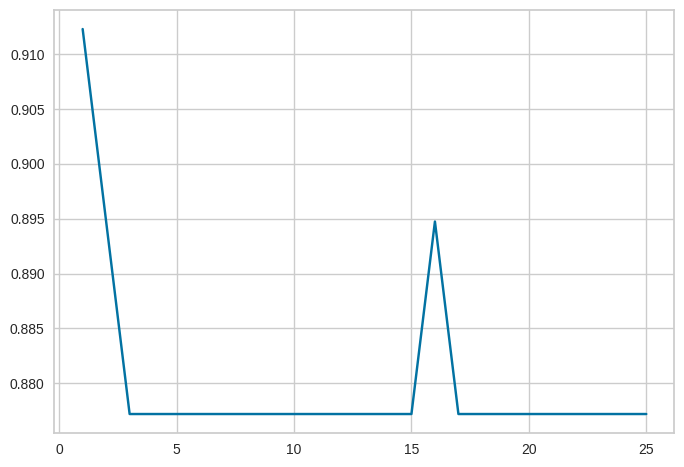

In [ ]:
DataForML['price']= 'High'
DataForML.loc[df['price']<11331.71,'price'] = 'Low'
Target='price'
Feature=['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','fueltype','doornumber','carbody']
X=DataForML[Feature].values
y=DataForML[Target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,26)
scores = []

from sklearn import metrics
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,np.ravel(y_train))
  y_pred=knn.predict(X_test)
  accuracy=metrics.accuracy_score(y_test,y_pred)
  scores.append(accuracy)

import matplotlib.pyplot as plt

plt.plot(k_range, scores)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X,np.ravel(y))
knn.predict([[99.8,177.3,66.3,2507.0,136.0,110.0,19.0,25.0,1.0,1.0,3.0]])

array(['Low'], dtype=object)

In [ ]:
knn.predict([[101.2,176.8,64.8,2395.0,108.0,101.0,23.0,29.0,1.0,1.0,3.0]])

array(['Low'], dtype=object)

In [ ]:
knn.predict([[94.5,158.8,63.6,1909,90,70,38,43,1,0,3]])

array(['Low'], dtype=object)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
y_pred_knn16 = knn.predict(X_test)
knn_score = metrics.accuracy_score(y_test,y_pred_knn16)*100

print("\t\tAccuracy Table")
print("Accuracy of K Neighbors Classifier Model: ",knn_score)

		Accuracy Table
Accuracy of K Neighbors Classifier Model:  89.47368421052632


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x7d3f502cb820>,
                estimator=KNeighborsClassifier(n_neighbors=16))

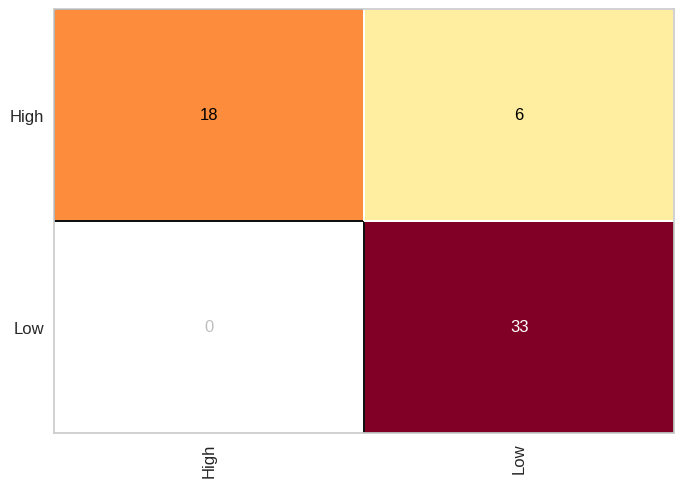

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn)
cm.fit(X_train,np.ravel(y_train))
cm.score(X_test,np.ravel(y_test))
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn16))

              precision    recall  f1-score   support

        High       1.00      0.75      0.86        24
         Low       0.85      1.00      0.92        33

    accuracy                           0.89        57
   macro avg       0.92      0.88      0.89        57
weighted avg       0.91      0.89      0.89        57



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter= 200)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = logreg.predict(X_test)

from sklearn import metrics

logreg_score = metrics.accuracy_score(y_test,y_pred)*100

print("\t\tAccuracy Table")
print("Accuracy of Logistic Regression Model: ",logreg_score)

		Accuracy Table
Accuracy of Logistic Regression Model:  89.47368421052632


In [ ]:
logreg.predict([[94.5,158.8,63.6,1909,90,70,38,43,1,0,3]])

array(['Low'], dtype=object)

In [ ]:
logreg.predict([[101.2,176.8,64.8,2395.0,108.0,101.0,23.0,29.0,1.0,1.0,3.0]])

array(['Low'], dtype=object)

In [ ]:
logreg.predict([[99.8,177.3,66.3,2507.0,136.0,110.0,19.0,25.0,1.0,1.0,3.0]])

array(['High'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(y_test,y_pred)
cm_logreg

array([[18,  6],
       [ 0, 33]])

ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x7d3f4b46ba60>,
                estimator=LogisticRegression(max_iter=200))

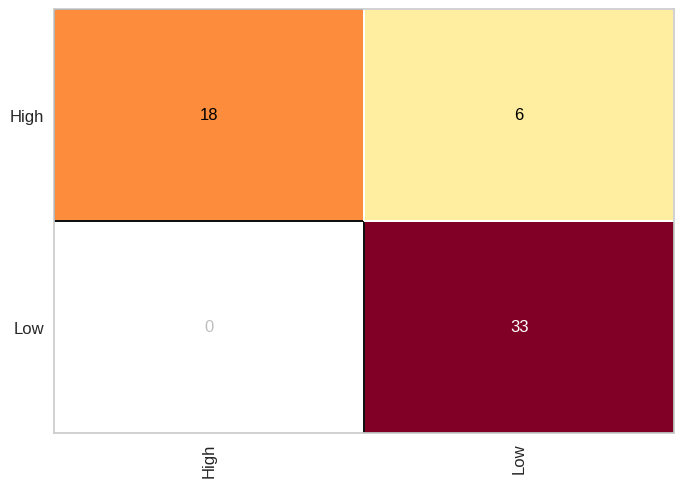

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logreg)
cm.fit(X_train,np.ravel(y_train))
cm.score(X_test,np.ravel(y_test))
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       1.00      0.75      0.86        24
         Low       0.85      1.00      0.92        33

    accuracy                           0.89        57
   macro avg       0.92      0.88      0.89        57
weighted avg       0.91      0.89      0.89        57



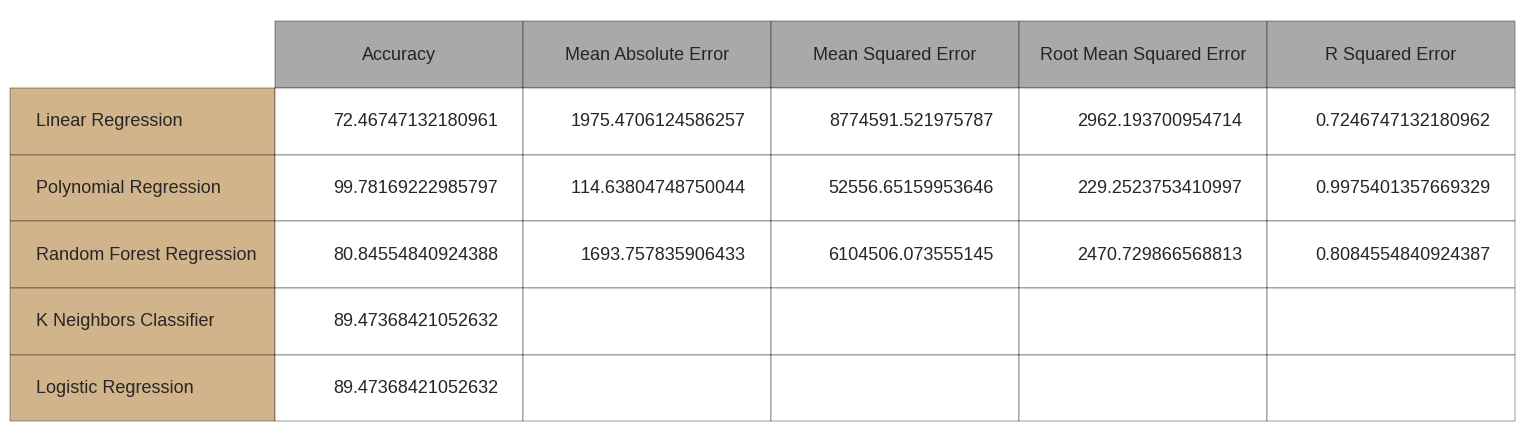

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[[linreg_test_score,linreg_MAE,linreg_MSE,linreg_RMSE,linreg_RSE],
      [pol_reg_score,pol_reg_MAE,pol_reg_MSE,pol_reg_RMSE,pol_reg_RSE],
      [r_f_reg_score,r_f_reg_MAE,r_f_reg_MSE,r_f_reg_RMSE,r_f_reg_RSE],
      [knn_score,'','','',''],
      [logreg_score,'','','','']]

column_labels=['Accuracy','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R Squared Error']

df=pd.DataFrame(data,columns=column_labels)

ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df.values,
        colLabels=df.columns,
        rowLabels=["Linear Regression","Polynomial Regression","Random Forest Regression",'K Neighbors Classifier','Logistic Regression'],
        rowColours =["tan"] * 5,
        colColours =["darkgrey"] * 5,
        loc="center")
table.set_fontsize(60)
table.scale(2,4)
plt.show()